  ## Dataset: Cardiovascular heart disease
  ## Dataset URL: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
  ## Algorithms Used: K Nearest Neighbors (KNN)


# Setup <a class="anchor"  id="setup"></a>


Importing all the required libraries and functions

In [1]:
!pip uninstall scikit-learn
!pip install scikit-learn
!pip install matplotlib

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 53.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
### Data Handline
import pandas as pd
import numpy as np

### Utility
import math
import warnings
import string

### Plotting
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


# Model
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay 


#LDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector

#RND Forest
from sklearn.ensemble import RandomForestClassifier

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Classifier
from sklearn import svm
from sklearn.svm import LinearSVC

# Seaborn
import seaborn as sns

warnings.filterwarnings("ignore")

**Load dataset.**

In [3]:
dataset = pd.read_csv("/content/cardio_train.csv",delimiter=";")

dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Data Preprocessing

In [5]:
number_of_entity = dataset.shape[0]*dataset.shape[1]
print('Number of entries in the dataframe: ', number_of_entity)

missing_value_count = dataset.isna().sum().sum()
print('Missing values: ', missing_value_count, '\n')

df_duplicate = dataset.duplicated().sum()
if df_duplicate:
    print('Duplicates Rows in Dataset are : {}'.format(df_duplicate))
else:
    print('Dataset contains no Duplicate Values')

Number of entries in the dataframe:  910000
Missing values:  0 

Dataset contains no Duplicate Values


In [6]:
#Remove all duplicated rows.
dataset.drop_duplicates(inplace=True)

#Remove id column because it is clearly not correlated in any way with the target
dataset.drop(['id'], axis=1,inplace=True)

In [7]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Observations**
- The 'Age' column needs to be recalculated because it contains minimum values that are unrealistic and suggest missing or incorrect data.
- The 'Weight' column contains minimum and maximum values that are unrealistic and need to be adjusted.
- The Systolic blood pressure "ap_hi" and Diastolic blood pressure "ap_lo" columns cannot have negative values.
- If the values in the ap_hi and ap_lo columns exceed 180 mmHg and 120 mmHg respectively, this indicates a hypertensive crisis, which is a medical emergency, so the maximum values in these columns should be adjusted accordingly.





In [8]:
#The 'Age' column in the dataset is expressed in days, so we need to convert it to years.
dataset['age'] = dataset['age'].apply(lambda x: x/365)  

In [9]:
outliers = len(dataset[(dataset["ap_hi"]>=280) | (dataset["ap_lo"]>=220) | (dataset["ap_lo"] < 0) | (dataset["ap_hi"] < 0) | (dataset["ap_hi"]<dataset["ap_lo"])])

print(f'Have total {outliers} outliers')
print(f'percent missing: {round(outliers/len(dataset)*100,1)}%')

Have total 1275 outliers
percent missing: 1.8%


In [10]:
#Filtering oSystolic blood pressure and Diastolic blood pressure
dataset = dataset[ (dataset['ap_lo'] >= 0) & (dataset['ap_hi'] >= 0) ]  #remove negative values
dataset = dataset[ (dataset['ap_lo'] <= 220) & (dataset['ap_hi'] <= 280) ]  #remove fishy data points
dataset = dataset[ (dataset['ap_lo'] < dataset['ap_hi']) ]  #remove systolic higher than diastolic


In [11]:
Q1_hi = dataset['ap_hi'].quantile(0.05) # 5th percentile of the data of the given feature
Q3_hi = dataset['ap_hi'].quantile(0.95)  # 95th percentile of the data of the given feature
IQR_hi = Q3_hi - Q1_hi
lower, upper = Q1_hi - 1.5 * IQR_hi, Q3_hi + 1.5 * IQR_hi
dataset = dataset[(dataset['ap_hi'] >= lower) & (dataset['ap_hi'] <= upper)]  

Q1_lo = dataset['ap_lo'].quantile(0.05) # 5th percentile of the data of the given feature
Q3_lo = dataset['ap_lo'].quantile(0.95)  # 95th percentile of the data of the given feature
IQR_lo = Q3_lo - Q1_lo
lower, upper = Q1_lo - 1.5 * IQR_lo, Q3_lo + 1.5 * IQR_lo
dataset = dataset[(dataset['ap_lo'] >= lower) & (dataset['ap_lo'] <= upper)]  

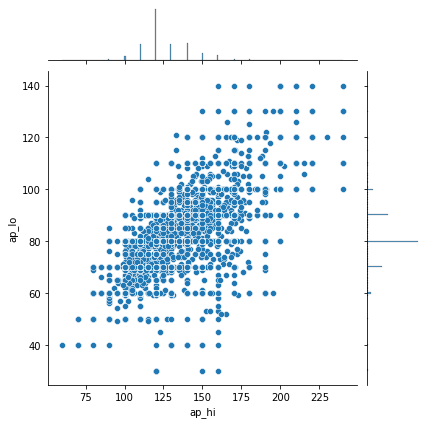

In [12]:
sns.jointplot(x='ap_hi', y='ap_lo', data=dataset);

## 1.1 - IQR based filtering - height, weight <a class="anchor"  id="iqr"></a>





<Axes: >

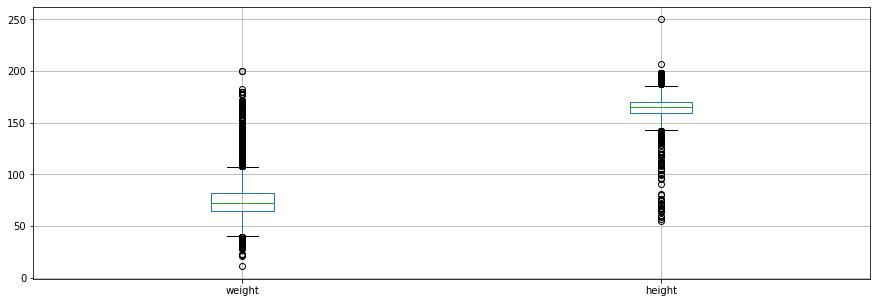

In [13]:
plt.figure(figsize=(15,5))
dataset.boxplot(['weight','height'])

In [14]:
#Filtering out the smallest and tallest human ever known were 54 cm and 251 cm respectively
len(dataset[(dataset['height'] > 251) | (dataset['height'] < 54)])

0

In [15]:
#Function that detects the outlier given interquartile range
def detect_outliers(df,q1,q3):
  for col in df.columns:
    df_feature = df[col]
    Q1 = df_feature.quantile(q1) # 25th percentile of the data of the given feature
    Q3 = df_feature.quantile(q3)  # 75th percentile of the data of the given feature
    IQR = Q3 - Q1    #IQR is interquartile range. 
    print(f'Feature: {col}-------------')
    print(f'Percentiles: {int(q1*100)}th={Q1}, {int(q3*100)}th={Q3}, IQR={IQR}')
    # calculate the outlier lower and upper bound
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # identify outliers
    outliers = [x for x in df_feature if x < lower or x > upper]
    print('Identified outliers: %d \n' % len(outliers))
    # remove outliers 
    #dataset = df[(df_feature >= lower) & (df_feature <= upper)]  
  
detect_outliers(dataset[['height', 'weight']],0.05,0.95)

Feature: height-------------
Percentiles: 5th=152.0, 95th=178.0, IQR=26.0
Identified outliers: 46 

Feature: weight-------------
Percentiles: 5th=55.0, 95th=100.0, IQR=45.0
Identified outliers: 20 



In [16]:
#After the observation we can remove the outliers weight, height
dataset_cleaned = dataset 
for col in ['height','weight']:
  Q1 = dataset[col].quantile(0.05) # 5th percentile of the data of the given feature
  Q3 = dataset[col].quantile(0.95)  # 95th percentile of the data of the given feature
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  dataset_cleaned = dataset_cleaned[(dataset_cleaned[col] >= lower) & (dataset_cleaned[col] <= upper)]  


## 1.2 - BMI - filtering <a class="anchor"  id="bmi"></a>

One way to potentially gain better insights from the data is to create a new feature called the Body Mass Index (BMI), which takes into account both height and weight. The BMI provides information about a person's general health status, indicating whether they fall within a normal weight range or not. The formula used to calculate BMI can be applied to the data.

\begin{equation}
BMI = \tfrac{weight}{height^2}
\end{equation}

*BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared*

In [17]:
# calculating the patient BMI (Body Mass Index)  
dataset_cleaned['BMI'] = round(dataset_cleaned['weight']/((dataset_cleaned['height']/100)**2),1)
dataset_cleaned.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [18]:
#The BMI data can be filtered to exclude extreme values that fall outside the healthy range according to the BMI chart.
dataset_cleaned = dataset_cleaned[ (dataset_cleaned['BMI'] < 60) & (dataset_cleaned['BMI'] > 10)]

In [19]:
#Dataset after cleaning
print(f'Number of rows of dataset dataset after data preprocessing: {len(dataset_cleaned)}')
print(f'How much percent missing: {round((70000-len(dataset_cleaned))/70000*100,2)}%')

Number of rows of dataset dataset after data preprocessing: 68584
How much percent missing: 2.02%


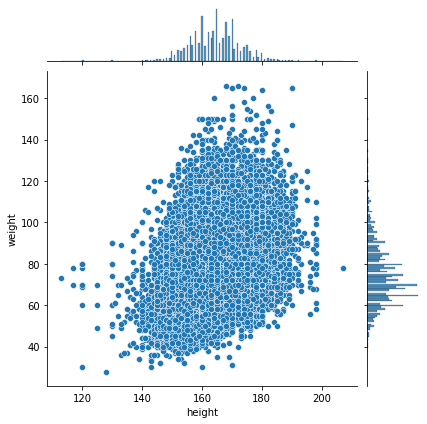

In [20]:
#For exploring the joint distribution of two numerical features, the Seaborn library's jointplot function can be an effective tool to use.
sns.jointplot(x='height', y='weight', data=dataset_cleaned);

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

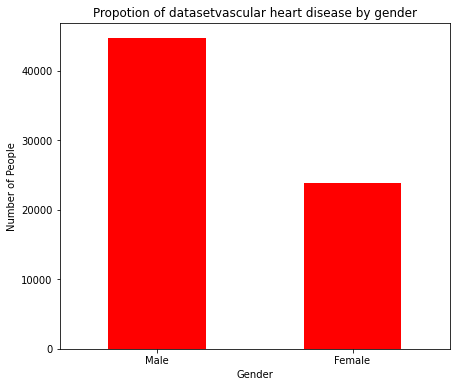

In [21]:
#Distribution of datasetvascular heart disease by gender
gender = dataset_cleaned['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="r")
ax.set_title("Propotion of datasetvascular heart disease by gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

- Based on the bar chart, it is evident that the likelihood of contracting the disease is greater among males compared to females.

# 2 - Feature Engineering <a class="anchor"  id="feature"></a>

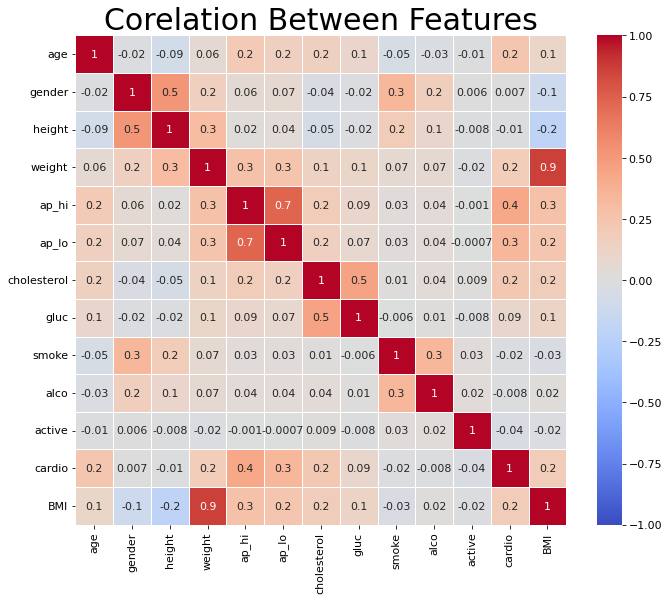

In [22]:
#plotting correlation map
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dataset_cleaned.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, fmt='.1g', linewidths=.5);
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

**Observations**
*   Age and cholesterol exhibit a noteworthy influence on the target variable, but their correlation is not particularly strong
*   Ap_hi displays the strongest correlation with the target variable, making it a crucial feature for our model. Ap_lo exhibits a similar pattern.
*   Although the newly created feature "BMI" is not highly correlated with the target variable, it does exhibit a high correlation with "weight". As such, it may be beneficial to drop one of these features to avoid potential multicollinearity issues.
*   Among the features, "gender", "smoking", and "height" display the weakest correlation with the target variable.




# 3- ML models <a class="anchor"  id="mlmodels"></a>

## 3.1 - Model preparation <a class="anchor"  id="modelprep"></a>




In [23]:
#Standardization
dataset_scaled=dataset_cleaned.copy()

columns_to_scale = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','gender','BMI','height']

scaler = StandardScaler()
dataset_scaled[columns_to_scale] = scaler.fit_transform(dataset_cleaned[columns_to_scale])

dataset_scaled.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,-0.434227,1.366947,0.453582,-0.853029,-0.999477,-0.137142,-0.537143,1,0,0,1,0,-1.047959
1,0.309323,-0.731557,-1.063527,0.772526,0.799796,0.923664,2.408948,1,0,0,1,1,1.437575
2,-0.246212,-0.731557,0.074304,-0.711677,0.200039,-1.197948,2.408948,1,0,0,0,1,-0.758943
3,-0.746234,1.366947,0.580007,0.560497,1.399554,1.984469,-0.537143,1,0,0,1,1,0.242977
4,-0.806609,-0.731557,-1.063527,-1.277087,-1.599234,-2.258753,-0.537143,1,0,0,0,0,-0.855282


The Minmax Scaler offers a different way of normalizing the features. 

In [24]:
#Standardization
dataset_scaled_mm=dataset_cleaned.copy()

columns_to_scale_mm = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','gender','BMI','height']

mmscaler = MinMaxScaler()
dataset_scaled_mm[columns_to_scale_mm] = mmscaler.fit_transform(dataset_cleaned[columns_to_scale_mm])

dataset_scaled_mm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0.588076,1.0,0.585106,0.246377,0.277778,0.454545,0.0,1,0,0,1,0,0.231557
1,0.730159,0.0,0.457447,0.413043,0.444444,0.545455,1.0,1,0,0,1,1,0.495902
2,0.624003,0.0,0.553191,0.260870,0.388889,0.363636,1.0,1,0,0,0,1,0.262295
3,0.528455,1.0,0.595745,0.391304,0.500000,0.636364,0.0,1,0,0,1,1,0.368852
4,0.516918,0.0,0.457447,0.202899,0.222222,0.272727,0.0,1,0,0,0,0,0.252049




---


**Train test split**

split ratio 80:2

In [25]:
#Train-test-split for non-scaled data
X = dataset_cleaned.drop(['cardio'], axis=1) #features 
y = dataset_cleaned['cardio']  #target feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)


#Train-test-split for scaled data
X_scaled = dataset_scaled.drop(['cardio'], axis=1) #features 
y_scaled = dataset_scaled['cardio']  #target feature

X_scaled_mm = dataset_scaled_mm.drop(['cardio'], axis=1) #features 
y_scaled_mm = dataset_scaled_mm['cardio']  #target feature

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle = True)
X_train_scaled_mm, X_test_scaled_mm, y_train_scaled_mm, y_test_scaled_mm = train_test_split(X_scaled_mm, y_scaled_mm, test_size=0.2, random_state=42, shuffle = True)


#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (54867, 12)
X_test shape is  (13717, 12)
y_train shape is  (54867,)
y_test shape is  (13717,)


## 3.2 - K-Nearest Neighbors <a class="anchor"  id="knn"></a>

K-nearest neighbors (KNN) is a popular machine learning technique for classification tasks. This method classifies an observation by evaluating the K closest neighbors and selecting the class that appears most frequently among those neighbors.



### 3.2.1 Basic Model 

- Calculate some reference values for different values of K
- Using unscaled data 
- Similar weighting of all features 
  (unscaled data weights features in itself)  
- Considering every feature

Values for K:
 1, 5, 10, 20, 30, 40, 50

K-value that results in highest accuracy is used for further optimizing the model.

In [26]:
# Creating classifiers for every value of K
classifiers = []
nb_neighbor = [1, 5, 10, 20, 30, 40, 50]
for i in range(len(nb_neighbor)):
    classifiers.append(KNeighborsClassifier(nb_neighbor[i]))

# Initializing the lists for accuracy, true positive rate and true negative rate
# Later used to compare the classifiers for different values of K
score_list = []
true_positive = []
true_negative = []

# Fitting the training dataset for every classifier and calculating metrics

index = 0
for clf in classifiers: 
    clf.fit(X_train,y_train)

    score = clf.score(X_test, y_test)    
    y_pred = clf.predict(X_test)
    
    print(f"Accuracy for K =", nb_neighbor[index] ,"nearest Neighbors: ",  accuracy_score(y_test, y_pred))

    
    cm = confusion_matrix(y_test, y_pred) # Confusion matrix  

    score_list.append(score)
    true_positive.append(cm[1][1])
    true_negative.append(cm[0][0])
    
    index = index + 1




Accuracy for K = 1 nearest Neighbors:  0.6324998177444048
Accuracy for K = 5 nearest Neighbors:  0.686155864985055
Accuracy for K = 10 nearest Neighbors:  0.7071517095574834
Accuracy for K = 20 nearest Neighbors:  0.7149522490340453
Accuracy for K = 30 nearest Neighbors:  0.7191076766056718
Accuracy for K = 40 nearest Neighbors:  0.7224611795582124
Accuracy for K = 50 nearest Neighbors:  0.7234089086534956


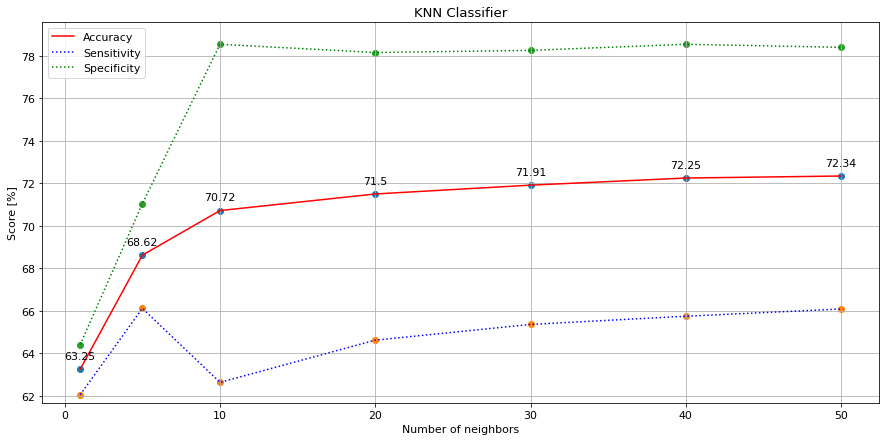

In [27]:
# Visualization of the results
plt.figure(figsize=(15, 7))
ax = ax
score_list = np.array(score_list)
score_list_plot = score_list * 100
true_positive_plot = np.array(true_positive)/sum(y_test) * 100
true_negative_plot = np.array(true_negative)/(len(y_test)-sum(y_test)) * 100
plt.plot(nb_neighbor, score_list_plot,  'r-')
plt.plot(nb_neighbor, true_positive_plot, 'b:')
plt.plot(nb_neighbor, true_negative_plot, 'g:')
plt.scatter(nb_neighbor, score_list_plot)
plt.scatter(nb_neighbor, true_positive_plot)
plt.scatter(nb_neighbor, true_negative_plot)
for x,y in zip(nb_neighbor,score_list_plot):

    label = "{:.2f}".format(y)

    plt.annotate(str(round(y, 2)), # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.ylim(min(score_list_plot)* 0.975, max(score_list_plot)*1.1)
plt.xlabel('Number of neighbors')
plt.ylabel('Score [%]')
plt.title('KNN Classifier')
plt.legend(['Accuracy', 'Sensitivity', 'Specificity'])
plt.grid(True)
plt.show()


### 3.2.2 Feature Subset Selection <a class="anchor"  id="knn2"></a>

To enhance the performance of our model, we will conduct a feature subset selection process using the top-performing KNN classifier from our initial model. We have already explored both forward and backward stepwise selection methods, and determined that backward stepwise selection yields higher accuracy. As such, we will employ this technique in this section.


In [28]:
# Find K with highest accuracy
max_score = max(score_list)
max_index = np.argmax(score_list)

max_nb_neighbor = nb_neighbor[max_index]


max_score_temp = max_score
opt_temp_classifier = KNeighborsClassifier(max_nb_neighbor)

print(f'The highest accuracy of:', round(max_score,4)*100, '% is achieved when considering', max_nb_neighbor, 'Neighbors')

The highest accuracy of: 72.34 % is achieved when considering 50 Neighbors


We are using a method called KNN to classify data, which relies on measuring distances between points. To make sure the method works well, we need to scale the data using a specific method called MinMax scaling. We also found that giving more weight to certain features that are more important can make the method work even better.

In [29]:
# BACKWARD STEPWISE SELECTION
all_features = dataset_scaled_mm.columns
all_features = all_features.drop(['cardio'])

# weighting features based on the correlation with cardio
corr_list = dataset_scaled_mm.corrwith(dataset_scaled_mm['cardio'])
corr_list.drop(['cardio'], inplace = True)
for column in all_features:
    X_scaled_mm[column] = X_scaled_mm[column] * np.abs(corr_list[column])

label_column = 'cardio'
feature_columns = [c for c in dataset_cleaned.columns if c != label_column]

clf_KNN_BSS = KNeighborsClassifier(max_nb_neighbor)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)



In [30]:
def get_base_acc(y): # Calculating the base accuracy (using the median)
    predictions = [np.median(y)] * len(y)
    return accuracy_score(y, predictions)


def k_fold_acc(X, y, classifier, kfold): # Performing a k-fold cross validation (k=5)
    scores = cross_validate(classifier, X, y, scoring = 'accuracy', cv = kfold)
    return np.mean(scores['test_score']) 

In [31]:
def backward_stepwise_selection(X, y, classifier, kfold, all_features): # Performing backward stepwise selection
    current_acc = k_fold_acc(X, y, classifier, kfold)

    current_features = np.arange(len(feature_columns)) 
    
    best_acc = current_acc
    best_features = current_features[:]
    
    # as long as there is at least one feature used
    while len(current_features) > 0:

        non_selected_feature = None
        
        # checking whether leaving out a feature improves the accuracy
        for feature in current_features:

            new_features = np.delete(current_features, np.where(current_features == feature))
            
            acc = k_fold_acc(X[all_features[new_features]], y, classifier, kfold)
            
            # non_selected feature leads to highest increase in accuracy
            if acc > current_acc:
                non_selected_feature = feature
                current_acc = acc
        
        # Deleting non_selected feature, if there is one that improves the accuracy when being left out
        if non_selected_feature is not None:

            current_features = np.delete(current_features, np.where(current_features == non_selected_feature))
        else:
            # Otherwise terminate and leave while-loop
            break
    
    # returning the features that are still in the model
    if current_acc > get_base_acc(y):

        return current_features, current_acc
    else:
      
        return [], get_base_acc(y)
    

In [32]:
# Calling the backward stepwise selection function
features, accuracy = backward_stepwise_selection(X_scaled_mm, y_scaled_mm, clf_KNN_BSS, kfold, all_features)

In [33]:
all_features = dataset_cleaned.columns
all_features = all_features.drop(['cardio'])
print("Selected features:")
for idx in sorted(features):
    print(f"\t{all_features[idx]}")

print("Features left out:")
for idx in (set(range(len(feature_columns))) - set(features)):
    print(f"\t{all_features[idx]}")
    
print(f"Accuracy of the selected model: {accuracy:.3f}")




Selected features:
	age
	gender
	height
	weight
	ap_hi
	ap_lo
	cholesterol
	gluc
	smoke
	active
	BMI
Features left out:
	alco
Accuracy of the selected model: 0.732


### 3.2.3 Hyperparameter Tuning <a class="anchor"  id="knn3"></a>
We are making some changes to our KNN model to improve its accuracy. We will only consider a subset of values for K that we have tried before to find the best value. Also, we will only use the features that were selected through backward stepwise selection to improve the model.


Accuracy for K = 1 nearest Neighbors:  0.6424145221258293
Accuracy for K = 10 nearest Neighbors:  0.7140045199387621
Accuracy for K = 25 nearest Neighbors:  0.7311365458919589
Accuracy for K = 50 nearest Neighbors:  0.7325216884158343
Accuracy for K = 100 nearest Neighbors:  0.7349274622730918
Accuracy for K = 150 nearest Neighbors:  0.7355106801778815
Accuracy for K = 200 nearest Neighbors:  0.7349274622730918
Accuracy for K = 250 nearest Neighbors:  0.7351461689873879
Accuracy for K = 300 nearest Neighbors:  0.7368229204636583
Accuracy for K = 350 nearest Neighbors:  0.736385507035066
Accuracy for K = 400 nearest Neighbors:  0.7363126047969673
Accuracy for K = 450 nearest Neighbors:  0.7361668003207699
Accuracy for K = 500 nearest Neighbors:  0.7374061383684479


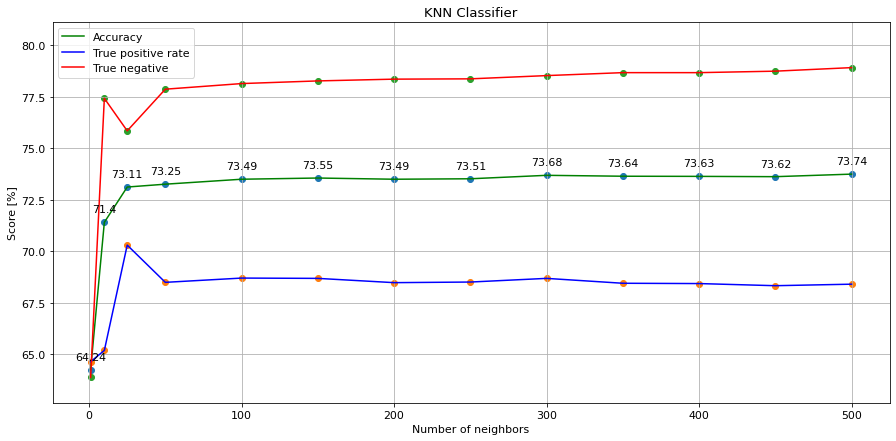

In [34]:
# For each classifier declare the parameters
classifiers = []
nb_neighbor = [1, 10, 25, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for i in range(len(nb_neighbor)):
    classifiers.append(KNeighborsClassifier(n_neighbors = nb_neighbor[i]))


# Only using the selected features
dataset_selected = dataset_cleaned.copy()
features_selected = [feature_columns[feature_i] for feature_i in range(len(feature_columns)) if feature_i in features]

X_KNN = X_scaled_mm[features_selected]
y_KNN = y_scaled_mm

X_KNN_train, X_KNN_test, y_KNN_train, y_KNN_test = train_test_split(X_KNN, y_KNN, test_size=0.2, random_state=42, shuffle = True)

accuracy_KNN = []
true_positive_KNN = []
true_negative_KNN = []

index = 0
for clf in classifiers: 
    clf.fit(X_KNN_train,y_KNN_train)

    score = clf.score(X_KNN_test, y_KNN_test)    
    y_KNN_pred = clf.predict(X_KNN_test)
    
    print(f"Accuracy for K =", nb_neighbor[index] ,"nearest Neighbors: ",  accuracy_score(y_KNN_test, y_KNN_pred))

    
    cm = confusion_matrix(y_KNN_test, y_KNN_pred) # Confusion matrix  

    accuracy_KNN.append(score)
    true_positive_KNN.append(cm[1][1])
    true_negative_KNN.append(cm[0][0])
    
    index = index + 1


# Again plotting the metrics for every classifier
plt.figure(figsize=(15, 7))
ax = ax
accuracy_KNN = np.array(accuracy_KNN)
score_list_plot = accuracy_KNN * 100
true_positive_plot = np.array(true_positive_KNN)/sum(y_test) * 100
true_negative_plot = np.array(true_negative_KNN)/(len(y_test)-sum(y_test)) * 100
plt.plot(nb_neighbor, score_list_plot,  'g')
plt.plot(nb_neighbor, true_positive_plot, 'b')
plt.plot(nb_neighbor, true_negative_plot, 'r-')
plt.scatter(nb_neighbor, score_list_plot)
plt.scatter(nb_neighbor, true_positive_plot)
plt.scatter(nb_neighbor, true_negative_plot)
for x,y in zip(nb_neighbor,score_list_plot):

    label = "{:.2f}".format(y)

    plt.annotate(str(round(y, 2)), # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.ylim(min(score_list_plot)* 0.975, max(score_list_plot)*1.1)
plt.xlabel('Number of neighbors')
plt.ylabel('Score [%]')
plt.title('KNN Classifier')
plt.legend(['Accuracy', 'True positive rate', 'True negative'])
plt.grid(True)
plt.show()



In [35]:
# Final Evaluation of KNN with "optimal" Classifier and subset of features
max_score = max([accuracy_KNN])
max_index = np.argmax(accuracy_KNN)

n_neighbor_opt = nb_neighbor[max_index]

opt_classifier_KNN = KNeighborsClassifier(n_neighbor_opt)
best_model = opt_classifier_KNN.fit(X_KNN_train,y_KNN_train)
y_KNN_pred = opt_classifier_KNN.predict(X_KNN_test)

 
cm_KNN = confusion_matrix(y_KNN_test, y_KNN_pred) # Confusion matrix  
true_positive_KNN = cm_KNN[1][1]/sum(y_test)
accuracy_KNN = accuracy_score(y_KNN_test, y_KNN_pred)
print('Accuracy =', accuracy_KNN)  
print('True positive rate =', cm_KNN[1][1]/sum(y_test))  

print('\n Confusion matrix \n \n')
print(classification_report(y_KNN_test, y_KNN_pred))

# plot_confusion_matrix(opt_classifier_KNN, X_KNN_test, y_KNN_test)
plt.show()


Accuracy = 0.7374061383684479
True positive rate = 0.6839608656981915

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6971
           1       0.76      0.68      0.72      6746

    accuracy                           0.74     13717
   macro avg       0.74      0.74      0.74     13717
weighted avg       0.74      0.74      0.74     13717



In [36]:
#collect results
tpr_weight = 0.25
models = pd.DataFrame({
    'Model': [' Nearest Neighbor'],
    'Accuracy': [accuracy_KNN],
                    
    'Sensitivity' : [true_positive_KNN],
    'Objective Value' : [accuracy_KNN+true_positive_KNN*tpr_weight] })

models

,Model,Accuracy,Sensitivity,Objective Value
0,Nearest Neighbor,0.737406,0.683961,0.908396


In [37]:
#collect results for plotting
df_plotting = pd.DataFrame({
    'Model': [' Nearest Neighbor', 
              ' Nearest Neighbor'],
    'Values': [accuracy_KNN,
             true_positive_KNN],
    'Type': ['Accuracy', 
             'Sensitivity'],
    'Color': ['purple','purple']})

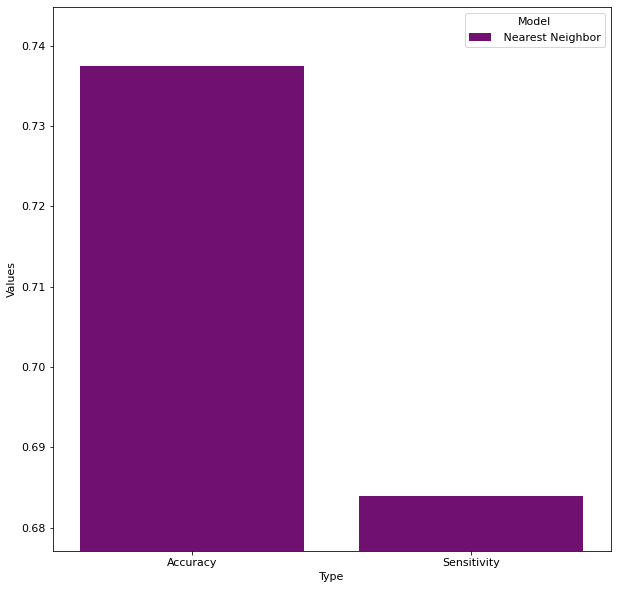

In [38]:
#plot result comparison
plt.figure(figsize=(10,10))
sns.barplot(y=df_plotting['Values'],x=df_plotting['Type'], hue=df_plotting['Model'], orient ="v", palette=df_plotting['Color'])
plt.ylim(min(df_plotting['Values'])* 0.99, max(df_plotting['Values'])*1.01)
#plt.gcf().set_size_inches(50,10)
plt.show()

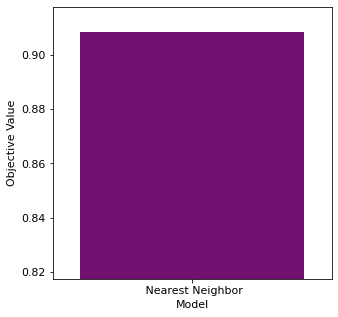

In [39]:
#plot result comparison
plt.figure(figsize=(5,5))
sns.barplot(y=models['Objective Value'],x=models['Model'], orient ="v", palette=df_plotting['Color'])
#sns.barplot(y=models['Sensitivity'],x=models['Model'], orient ="v")
plt.ylim(min(models['Objective Value'])* 0.9, max(models['Objective Value'])*1.01)
#sns.despine()
plt.show()